In [1]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

# Settings
plt.rc('font', family='Times New Roman', size=14)
plt.rcParams['mathtext.fontset'] = 'custom'

plt.rcParams['mathtext.it'] = 'STIXGeneral:italic'
plt.rcParams['mathtext.rm'] = 'STIXGeneral:bold'
plt.rcParams['mathtext.tt'] = 'STIXGeneral'
plt.rcParams['mathtext.bf'] = 'STIXGeneral:bold:italic'
plt.rcParams['mathtext.cal'] = 'STIXGeneral'
plt.rcParams['mathtext.sf'] = 'STIXGeneral'

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1

# start plot

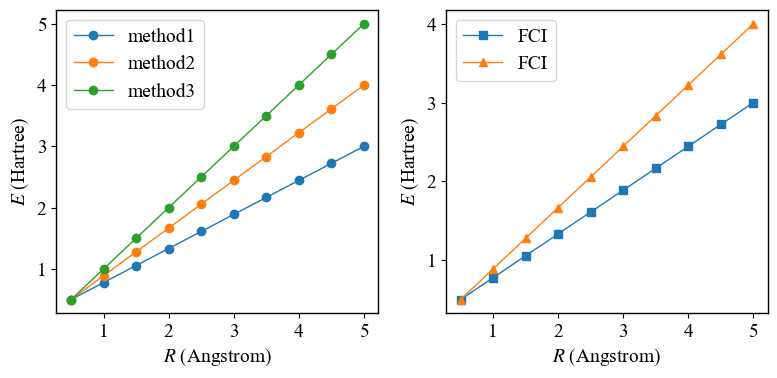

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))

import numpy as np
xdata = np.linspace(0.5,5,10)
ydata = np.linspace(0.5,3,10)
ydata2 = np.linspace(0.5,4,10)
ydata3 = np.linspace(0.5,5,10)

axs[0].plot(xdata, ydata, 'o-', label='method1')
axs[0].plot(xdata, ydata2, 'o-', label='method2')
axs[0].plot(xdata, ydata3, 'o-', label='method3')

axs[0].set_xlabel('$R$ (Angstrom)')
axs[0].set_ylabel('$E$ (Hartree)')
axs[0].legend()

axs[1].plot(xdata, ydata, 's-', label='FCI')
axs[1].plot(xdata, ydata2, '^-', label='FCI')

axs[1].set_xlabel('$R$ (Angstrom)')
axs[1].set_ylabel('$E$ (Hartree)')
axs[1].legend()

plt.tight_layout()
plt.savefig('example.pdf')